# RETAIL STORE ANALYSIS

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# **Importing the Dataset**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
cust = pd.read_csv("Customer.csv")
trans = pd.read_csv("Transactions.csv")
pcat = pd.read_csv("prod_cat_info.csv")

# Data Clean-Up

In [4]:
cust.isnull().sum()
# As some customers don't wante to share their gender and city_code of 
# personal address so these NULL values will not effect our Analysis at great scale

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [5]:
print(np.shape(cust),"\n")
print(len(cust),"\n")
print(cust.nunique())
#so there are no duplicate customers so clean is done

(5647, 4) 

5647 

customer_Id    5647
DOB            4056
Gender            2
city_code        10
dtype: int64


In [6]:
#DOB of cutomers
cust["DOB"] = pd.to_datetime(cust.DOB, dayfirst = True).dt.normalize()

In [7]:
print(np.shape(pcat),"\n")
print(len(pcat),"\n")
print(pcat.nunique(), "\n")
print(pcat.isnull().sum())
# as there can me many way to categories the product so duplicate aren't a big problem here
# as there are no null values thats all matters


(23, 4) 

23 

prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64 

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64


In [8]:
cust.rename(columns = {'customer_Id':'cust_id'}, inplace =True)

trans.rename(columns = {'prod_subcat_code':'prod_sub_cat_code'}, inplace =True)

trans["tran_date"] = pd.to_datetime(trans.tran_date, dayfirst = True).dt.normalize()

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.


In [9]:
Customer_Final = pd.merge(trans, cust, on ="cust_id", how = "left" )
Customer_Final = pd.merge(Customer_Final, pcat, left_on =["prod_sub_cat_code","prod_cat_code"], 
                          right_on=["prod_sub_cat_code","prod_cat_code"], how = "left")

In [10]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


#  2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types

In [11]:
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_subcat                  object
dtype: object

### b. Top/Bottom 10 observations

In [12]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [13]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
Customer_Final.describe(include = "number").T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
cust_id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_sub_cat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [15]:
Customer_Final.describe(include = "datetime", datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
tran_date,23053,2012-08-09 05:21:26.617793792,2011-01-25,2011-11-03,2012-08-11,2013-05-17,2014-02-28
DOB,23053,1981-07-14 21:22:57.816336256,1970-01-02,1975-09-26,1981-06-16,1987-06-05,1992-12-29


### d. Frequency tables for all the categorical variables

In [16]:
Customer_Final.describe(include = "object").T

,count,unique,top,freq
Store_type,23053,4,e-Shop,9311
Gender,23044,2,M,11811
prod_cat,23053,6,Books,6069
prod_subcat,23053,18,Women,3048


In [17]:
datatypes = Customer_Final.dtypes.to_dict()
numerical = ['prod_sub_cat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']
objects = ['Store_type', 'Gender', 'prod_cat', 'prod_subcat']
datetime  = ['tran_date', 'DOB']
        
print(numerical)
print(objects)
print(datetime)

['prod_sub_cat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']
['Store_type', 'Gender', 'prod_cat', 'prod_subcat']
['tran_date', 'DOB']


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

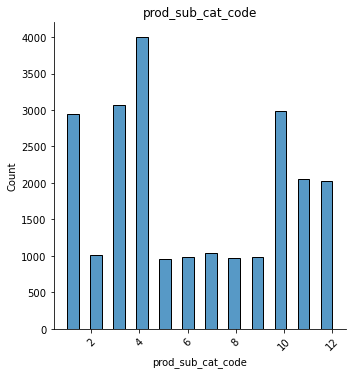

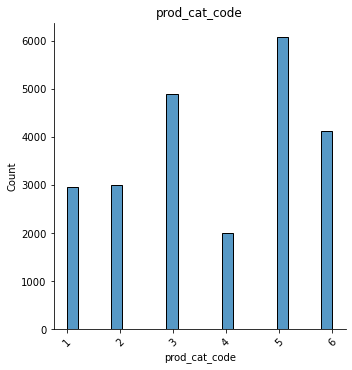

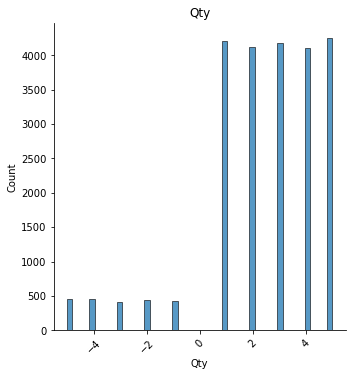

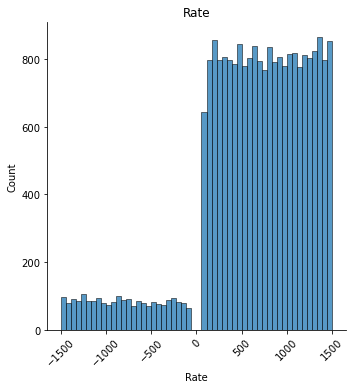

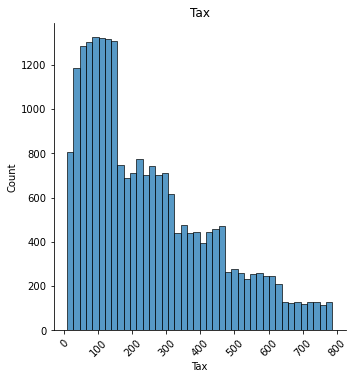

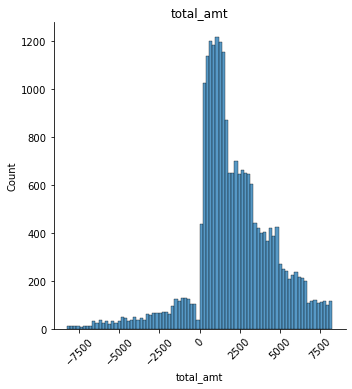

In [18]:
for i in numerical:
    sns.displot(Customer_Final[i], palette = 'muted')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

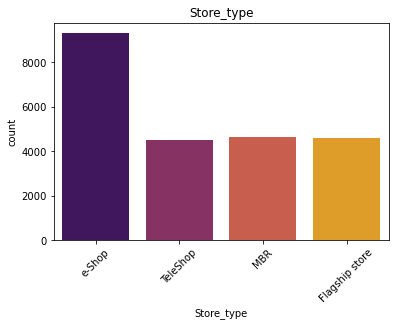

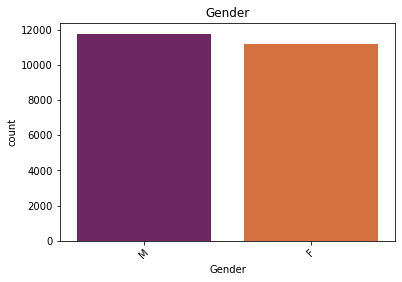

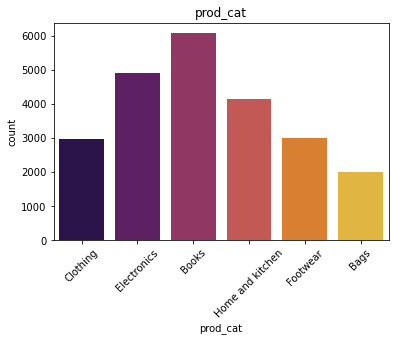

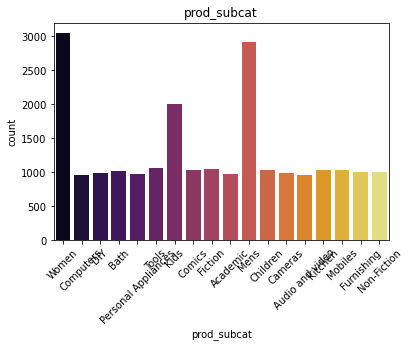

In [19]:
for i in objects:
    #plt.figure(figsize = (8,8)) can can desired figure size
    sns.countplot(x  = Customer_Final[i], palette = 'inferno')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

# 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data


In [20]:
start  = str(Customer_Final.tran_date.min())[0:10]
upto = str(Customer_Final.tran_date.max())[0:10]
print(f"Time Period is from {start} to {upto}")

Time Period is from 2011-01-25 to 2014-02-28


### b. Count of transactions where the total amount of transaction was negative

In [21]:
#x  = Customer_Final.loc[Customer_Final["total_amt"]<0]["total_amt"].count()
#above is the alternative solution

x = len(Customer_Final.loc[Customer_Final["total_amt"]<0])
print("Count of transactions where the total amount of transaction was negative: ", x)

Count of transactions where the total amount of transaction was negative:  2177


# 5. Analyze which product categories are more popular among females vs male customers.

In [22]:
cat_cust = Customer_Final.groupby(["Gender","prod_cat"]).Qty.sum().reset_index()
cat_cust.T

,0,1,2,3,4,5,6,7,8,9,10,11
Gender,F,F,F,F,F,F,M,M,M,M,M,M
prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Qty,2362,7070,3425,5832,3716,4895,2346,7587,3748,6476,3555,5041


In [23]:
cat_cust.pivot(index = "Gender",  columns = 'prod_cat', values = 'Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [24]:
city_cust = Customer_Final.groupby("city_code")["cust_id"].count().reset_index()
city_cust.rename(columns = {'cust_id':'count_cust'}, inplace =True)
city_cust[city_cust['count_cust'] == city_cust.count_cust.max()]

,city_code,count_cust
3,4.0,2422


# 7. Which store type sells the maximum products by value and by quantity?

In [25]:
store_val = Customer_Final.groupby(by =['Store_type'], as_index = False)["Qty"].sum()
store_qty = Customer_Final.groupby(by =['Store_type'], as_index = False)["Rate"].sum()

store_val = store_val.sort_values(by = 'Qty', ascending = False)
store_qty = store_qty.sort_values(by = 'Rate', ascending = False)
out = pd.merge(store_qty, store_val, how = 'inner')

print(out)

       Store_type     Rate    Qty
0          e-Shop  5941001  22763
1             MBR  2953253  11194
2  Flagship store  2941557  11133
3        TeleShop  2834420  10984


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [26]:
E = Customer_Final[(Customer_Final.Store_type == 'Flagship store') & 
                             (Customer_Final.prod_cat == 'Electronics')]['total_amt'].sum()

C = Customer_Final[(Customer_Final.Store_type == 'Flagship store') & 
                             (Customer_Final.prod_cat == 'Clothing')]['total_amt'].sum()

print(f"Total amount earned from the Electronics and Clothing is: {E+C}")

Total amount earned from the Electronics and Clothing is: 3409559.27


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [27]:
M = Customer_Final[(Customer_Final.Gender == 'M') & 
                             (Customer_Final.prod_cat == 'Electronics')]['total_amt'].sum()
M = round(M,2)
print(f'total amount earned from "Male" customers under the "Electronics" is: {M}')

total amount earned from "Male" customers under the "Electronics" is: 5703109.42


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [28]:
non_neg = Customer_Final[Customer_Final['total_amt']>0]
ten_u = non_neg.groupby('cust_id')['transaction_id'].count().reset_index()
ten_u = ten_u[ten_u['transaction_id']>10]
x  = len(ten_u)
print(f'There are {x} customers who have more than ten unique transactions')

There are 6 customers who have more than ten unique transactions


# 11. For all customers aged between 25 - 35, find out:

In [29]:
today = pd.Timestamp('now')

cust_age = Customer_Final
cust_age['Age'] = (today - Customer_Final['DOB']).astype('<m8[Y]')
cust_25_35 = cust_age[(cust_age.Age>=25) & (cust_age.Age<=35)]
cust_36_45 = cust_age[(cust_age.Age>=36) & (cust_age.Age<=45)]
cust_46_55 = cust_age[(cust_age.Age>=46) & (cust_age.Age<=55)]
cust_55_above = cust_age[(cust_age.Age>=56)]

In [30]:
today = pd.Timestamp('now')
Customer_Final['Age'] = (today - Customer_Final['DOB']).astype('<m8[Y]')
Customer_Final['Age_cat'] = pd.cut(Customer_Final['Age'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [31]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,Age,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women,40.0,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers,49.0,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,29.0,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath,41.0,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,29.0,25-35
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances,39.0,36-46
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath,41.0,36-46
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools,51.0,47-57
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids,50.0,47-57
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances,42.0,36-46


###  a. What was the total amount spent for “Electronics” and “Books” product categories?

In [32]:
E = cust_25_35[cust_25_35.prod_cat == 'Electronics']['total_amt'].sum()

B = cust_25_35[cust_25_35.prod_cat == 'Books']['total_amt'].sum()

tot = round((E+B),2)
print(f"Total amount earned from the Electronics and Books is: {tot}")

Total amount earned from the Electronics and Books is: 6527593.02


###  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [33]:
sd = cust_age[(cust_age['tran_date'] >='2014-01-01') & (cust_age['tran_date'] <='2014-03-01')]['total_amt'].sum()
print(f"the total amount spent by these customers between \n1st Jan, 2014 to 1st Mar, 2014 is : ${sd} ")

the total amount spent by these customers between 
1st Jan, 2014 to 1st Mar, 2014 is : $2235642.63 


# Insights

In [34]:
Customer_Final['tran_year'] = Customer_Final['tran_date'].dt.year
Customer_Final['tran_month'] = Customer_Final['tran_date'].dt.month

## Year-Month wise Sales

In [35]:
y_m = Customer_Final.groupby(['tran_year','tran_month']).agg(
    order_num = ('transaction_id','count'),
    cust_nos = ('cust_id','nunique'),
    sales = ('total_amt','sum'),
    tax_total = ('Tax', 'sum')).reset_index()
y_m['gross_sale'] = y_m['sales']-y_m['tax_total']
y_m.head()

,tran_year,tran_month,order_num,cust_nos,sales,tax_total,gross_sale
0,2011,1,141,135,337307.880,34484.310,302823.57
1,2011,2,563,485,1087283.535,135272.025,952011.51
2,2011,3,649,566,1376537.175,160776.315,1215760.86
3,2011,4,609,536,1379838.915,157152.975,1222685.94
4,2011,5,585,514,1174157.530,145379.850,1028777.68


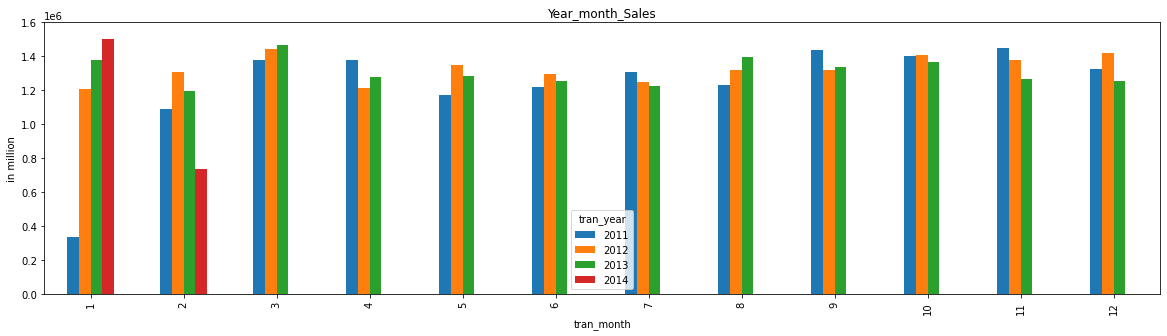

In [36]:
y_m.pivot(index='tran_month', columns='tran_year', values='sales').plot(kind='bar',figsize=(20,5))
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 600
plt.savefig("Year_month_Sales.jpg")
plt.ylim(0,1600000)
plt.ylabel('in million')
plt.title('Year_month_Sales')
plt.show()

## Store: Year-Wise Sales and Customer Count

In [37]:
st = Customer_Final.groupby(['tran_year','Store_type']).total_amt.sum().astype('float64').reset_index()
st.pivot(index = 'Store_type', columns ='tran_year').plot(kind='bar',figsize=(20,10))
plt.title('Store: Year_wise sales')
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 400
plt.ylim(0,7000000)
plt.ylabel('in million')
plt.savefig("Store_year_wise.jpg")
plt.show()

## Category wise Sales

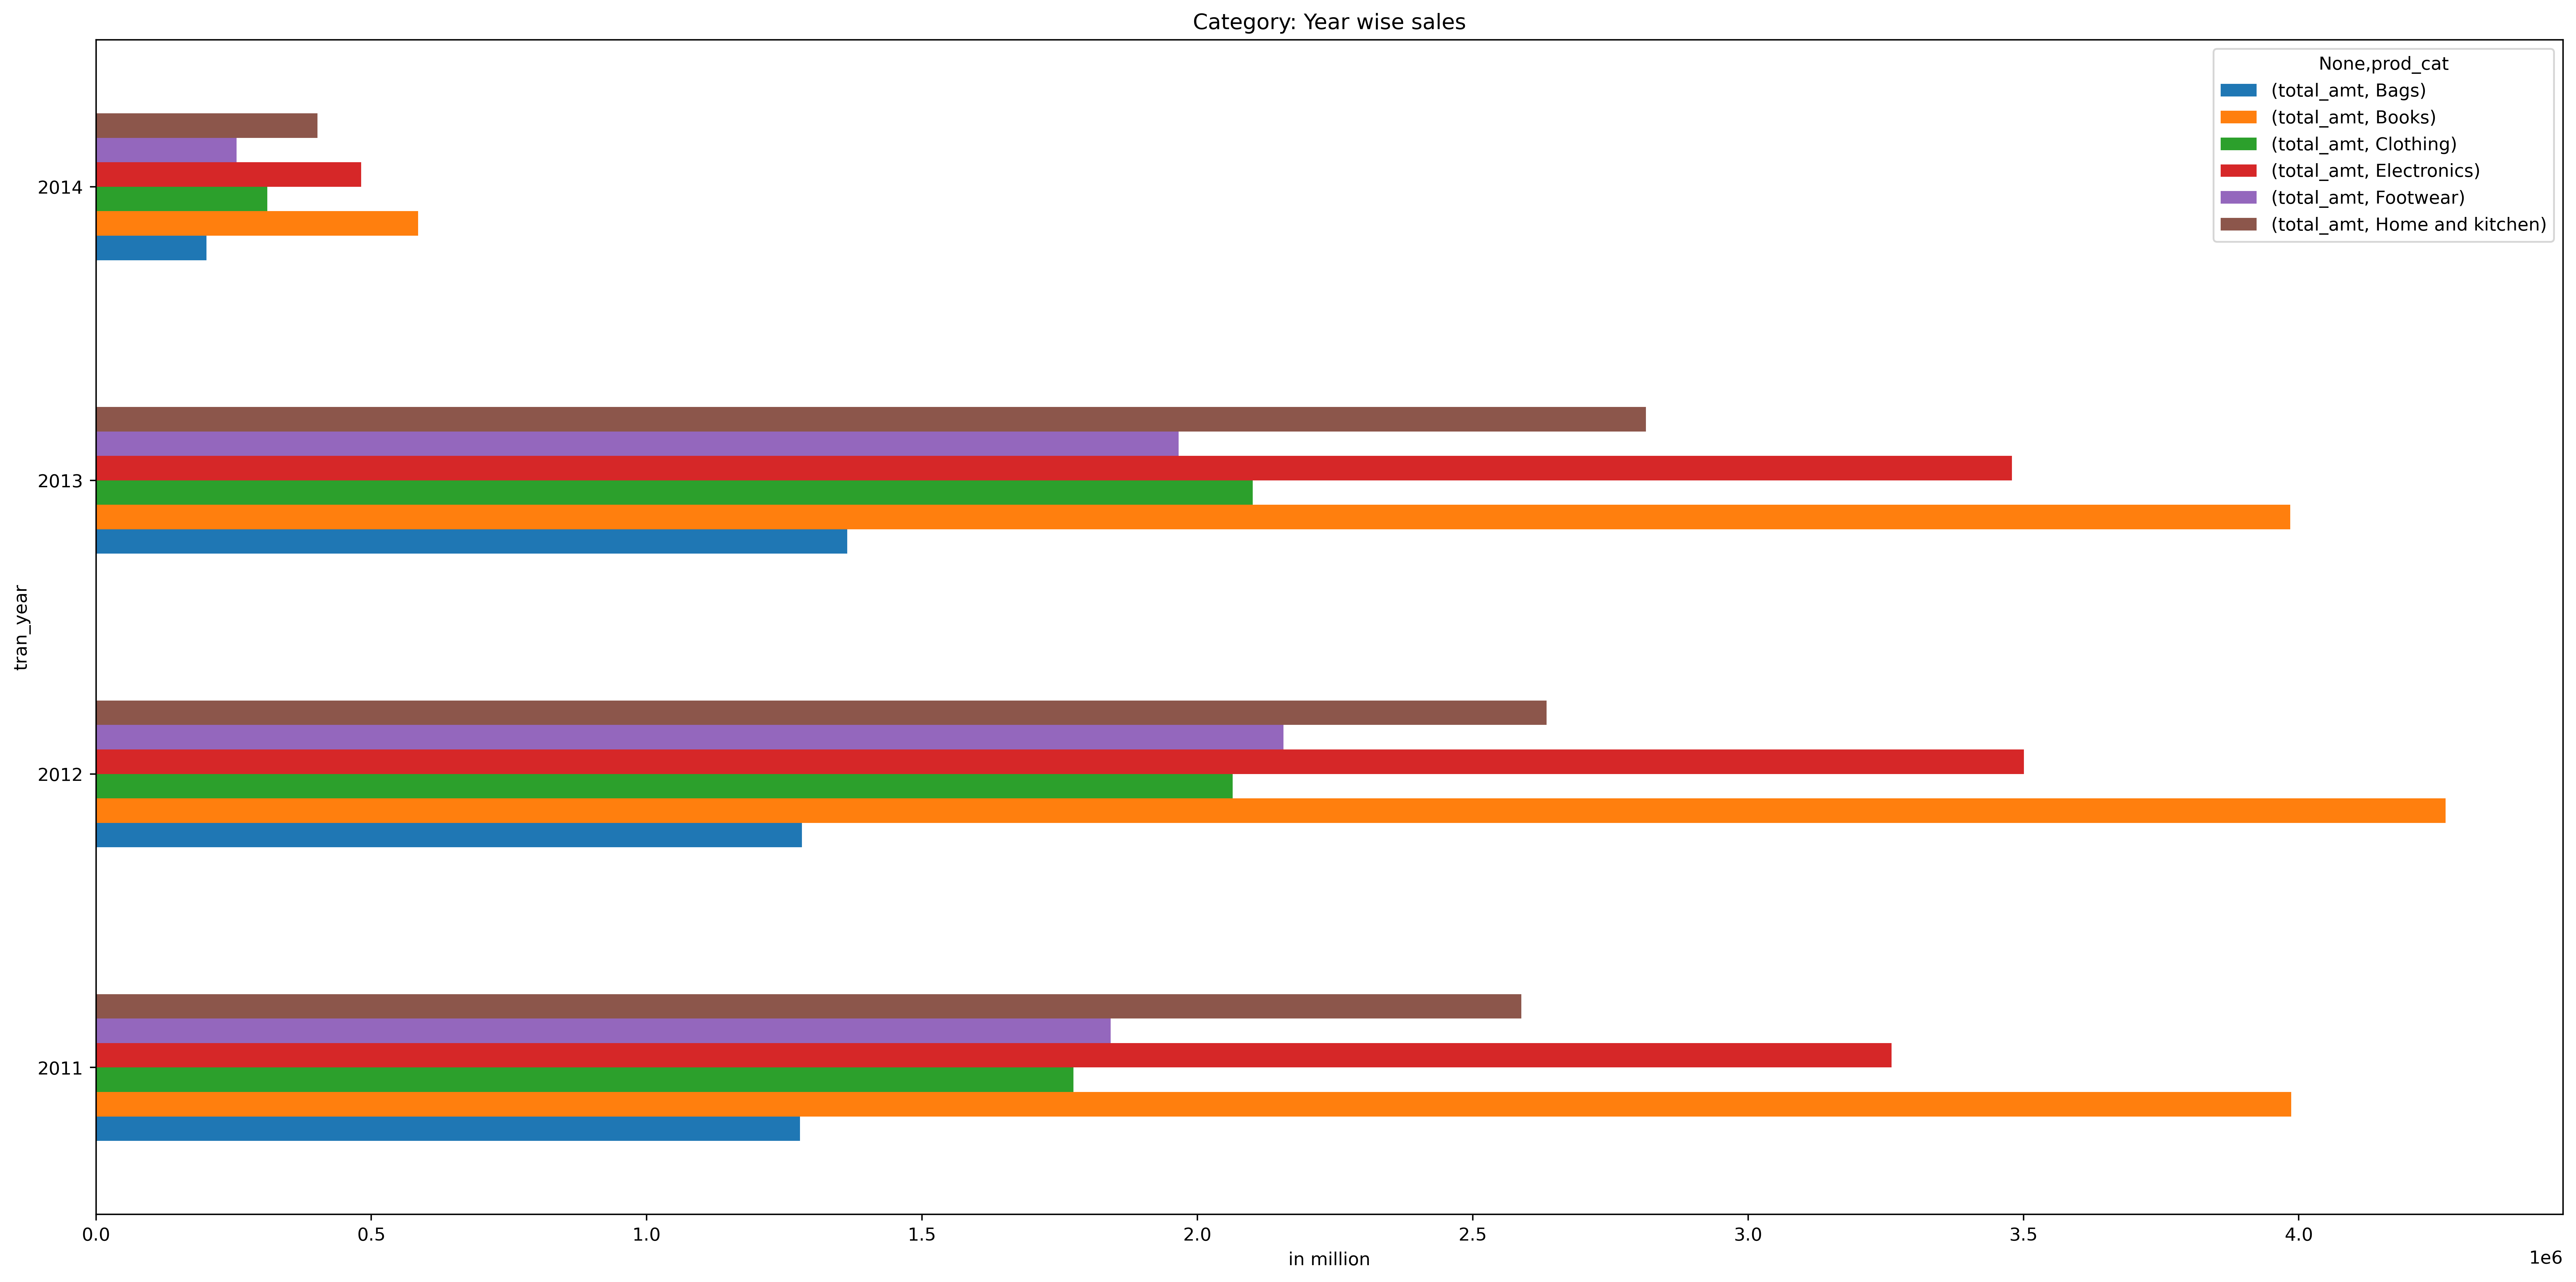

In [38]:
ct = Customer_Final.groupby(['tran_year','prod_cat']).total_amt.sum().astype('float64').reset_index()
ct.pivot(index=['tran_year'], columns=['prod_cat']).plot(kind='barh',figsize=(20,10))
plt.title('Category: Year wise sales')
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 400
#plt.ylim(0,7000000)
plt.xlabel('in million')
plt.savefig("category wise sales.jpg")
plt.show()

## Top Customer

In [39]:
cust_w =Customer_Final.groupby(['cust_id']).total_amt.sum().reset_index()
cust_w.sort_values(by='total_amt' ,ascending=False).head(5).reset_index(drop=True)

,cust_id,total_amt
0,271834,41510.43
1,273140,35861.67
2,272354,33954.44
3,267419,33828.47
4,274948,33158.84


In [40]:
cust_w =Customer_Final.groupby(['Store_type','cust_id']).total_amt.sum().reset_index()
cust_w.sort_values(by='total_amt' ,ascending=False).head(10).reset_index(drop=True)

,Store_type,cust_id,total_amt
0,e-Shop,270561,22333.155
1,e-Shop,274948,21791.705
2,e-Shop,267634,21699.990
3,e-Shop,274306,21596.120
4,e-Shop,275017,21383.960
5,e-Shop,274854,21214.895
6,e-Shop,270706,21051.355
7,e-Shop,270131,20625.930
8,e-Shop,269991,20559.630
9,MBR,272633,19861.270


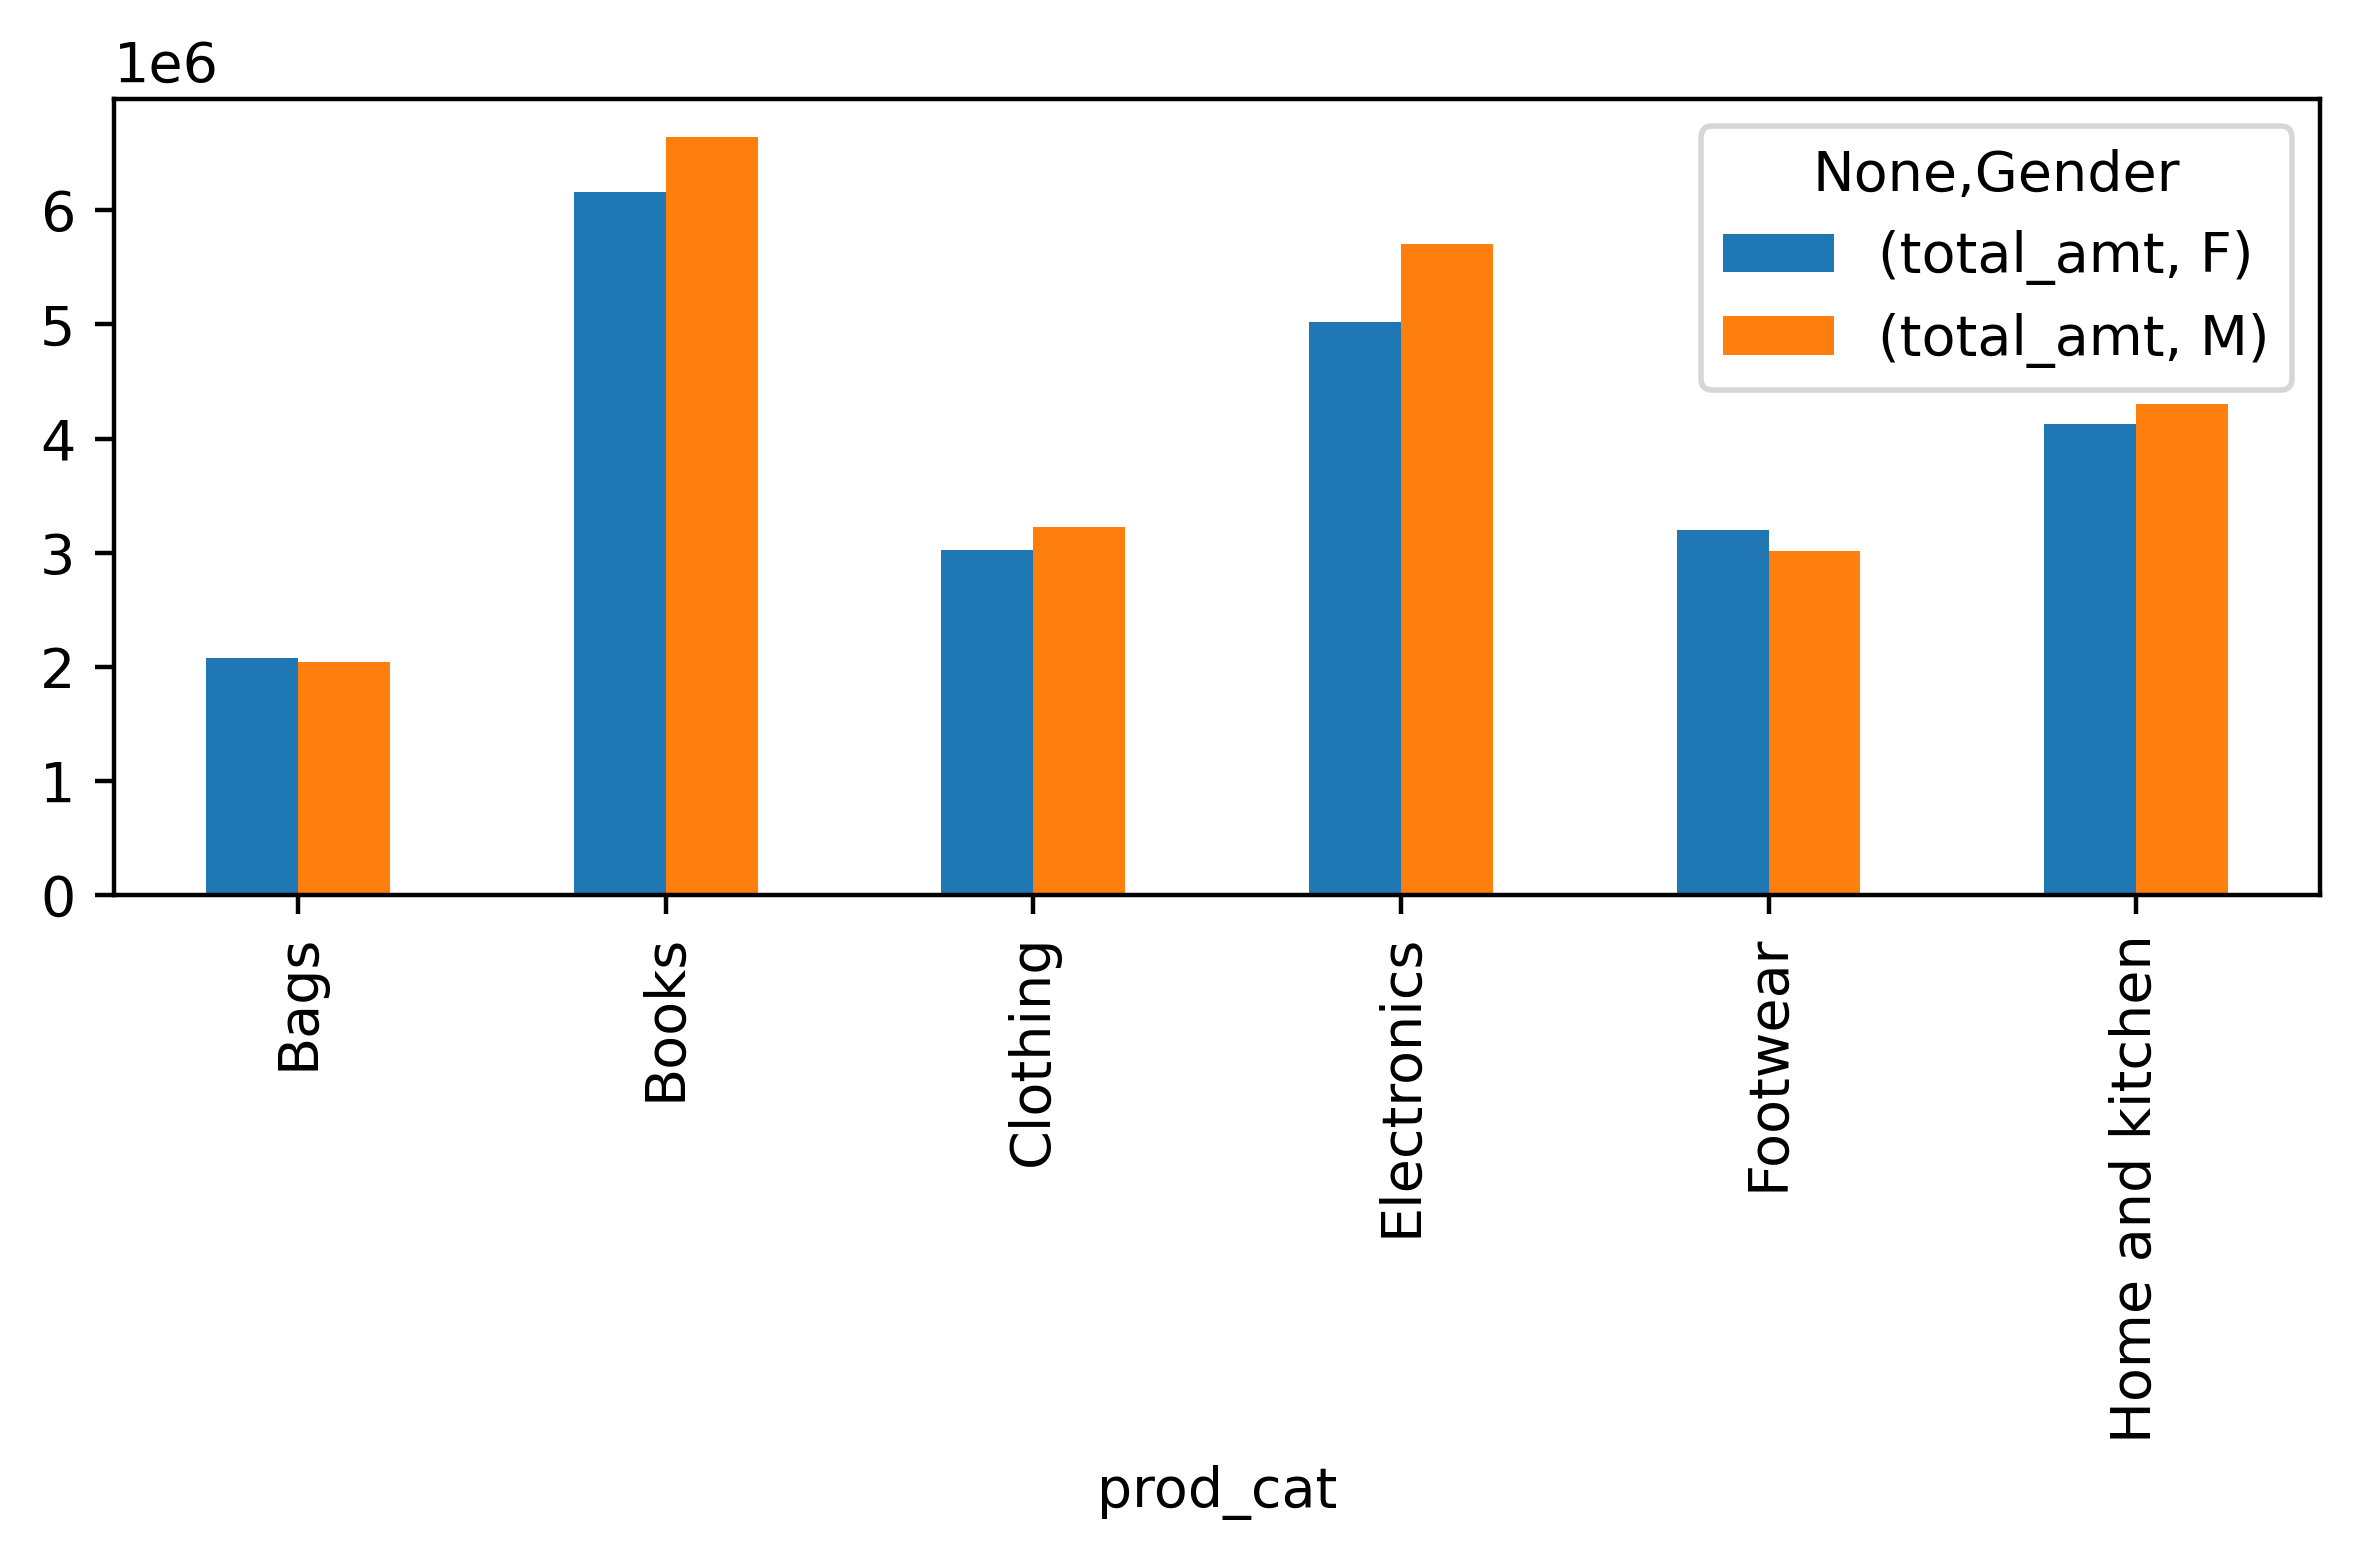

In [41]:
cust_w =Customer_Final.groupby(['Gender','prod_cat',]).total_amt.sum().reset_index()
cust_w.sort_values(by='prod_cat').reset_index(drop=True).pivot(index='prod_cat' ,columns='Gender').plot(kind='bar')
plt.savefig('Gender Poularity.jpg')
plt.show()

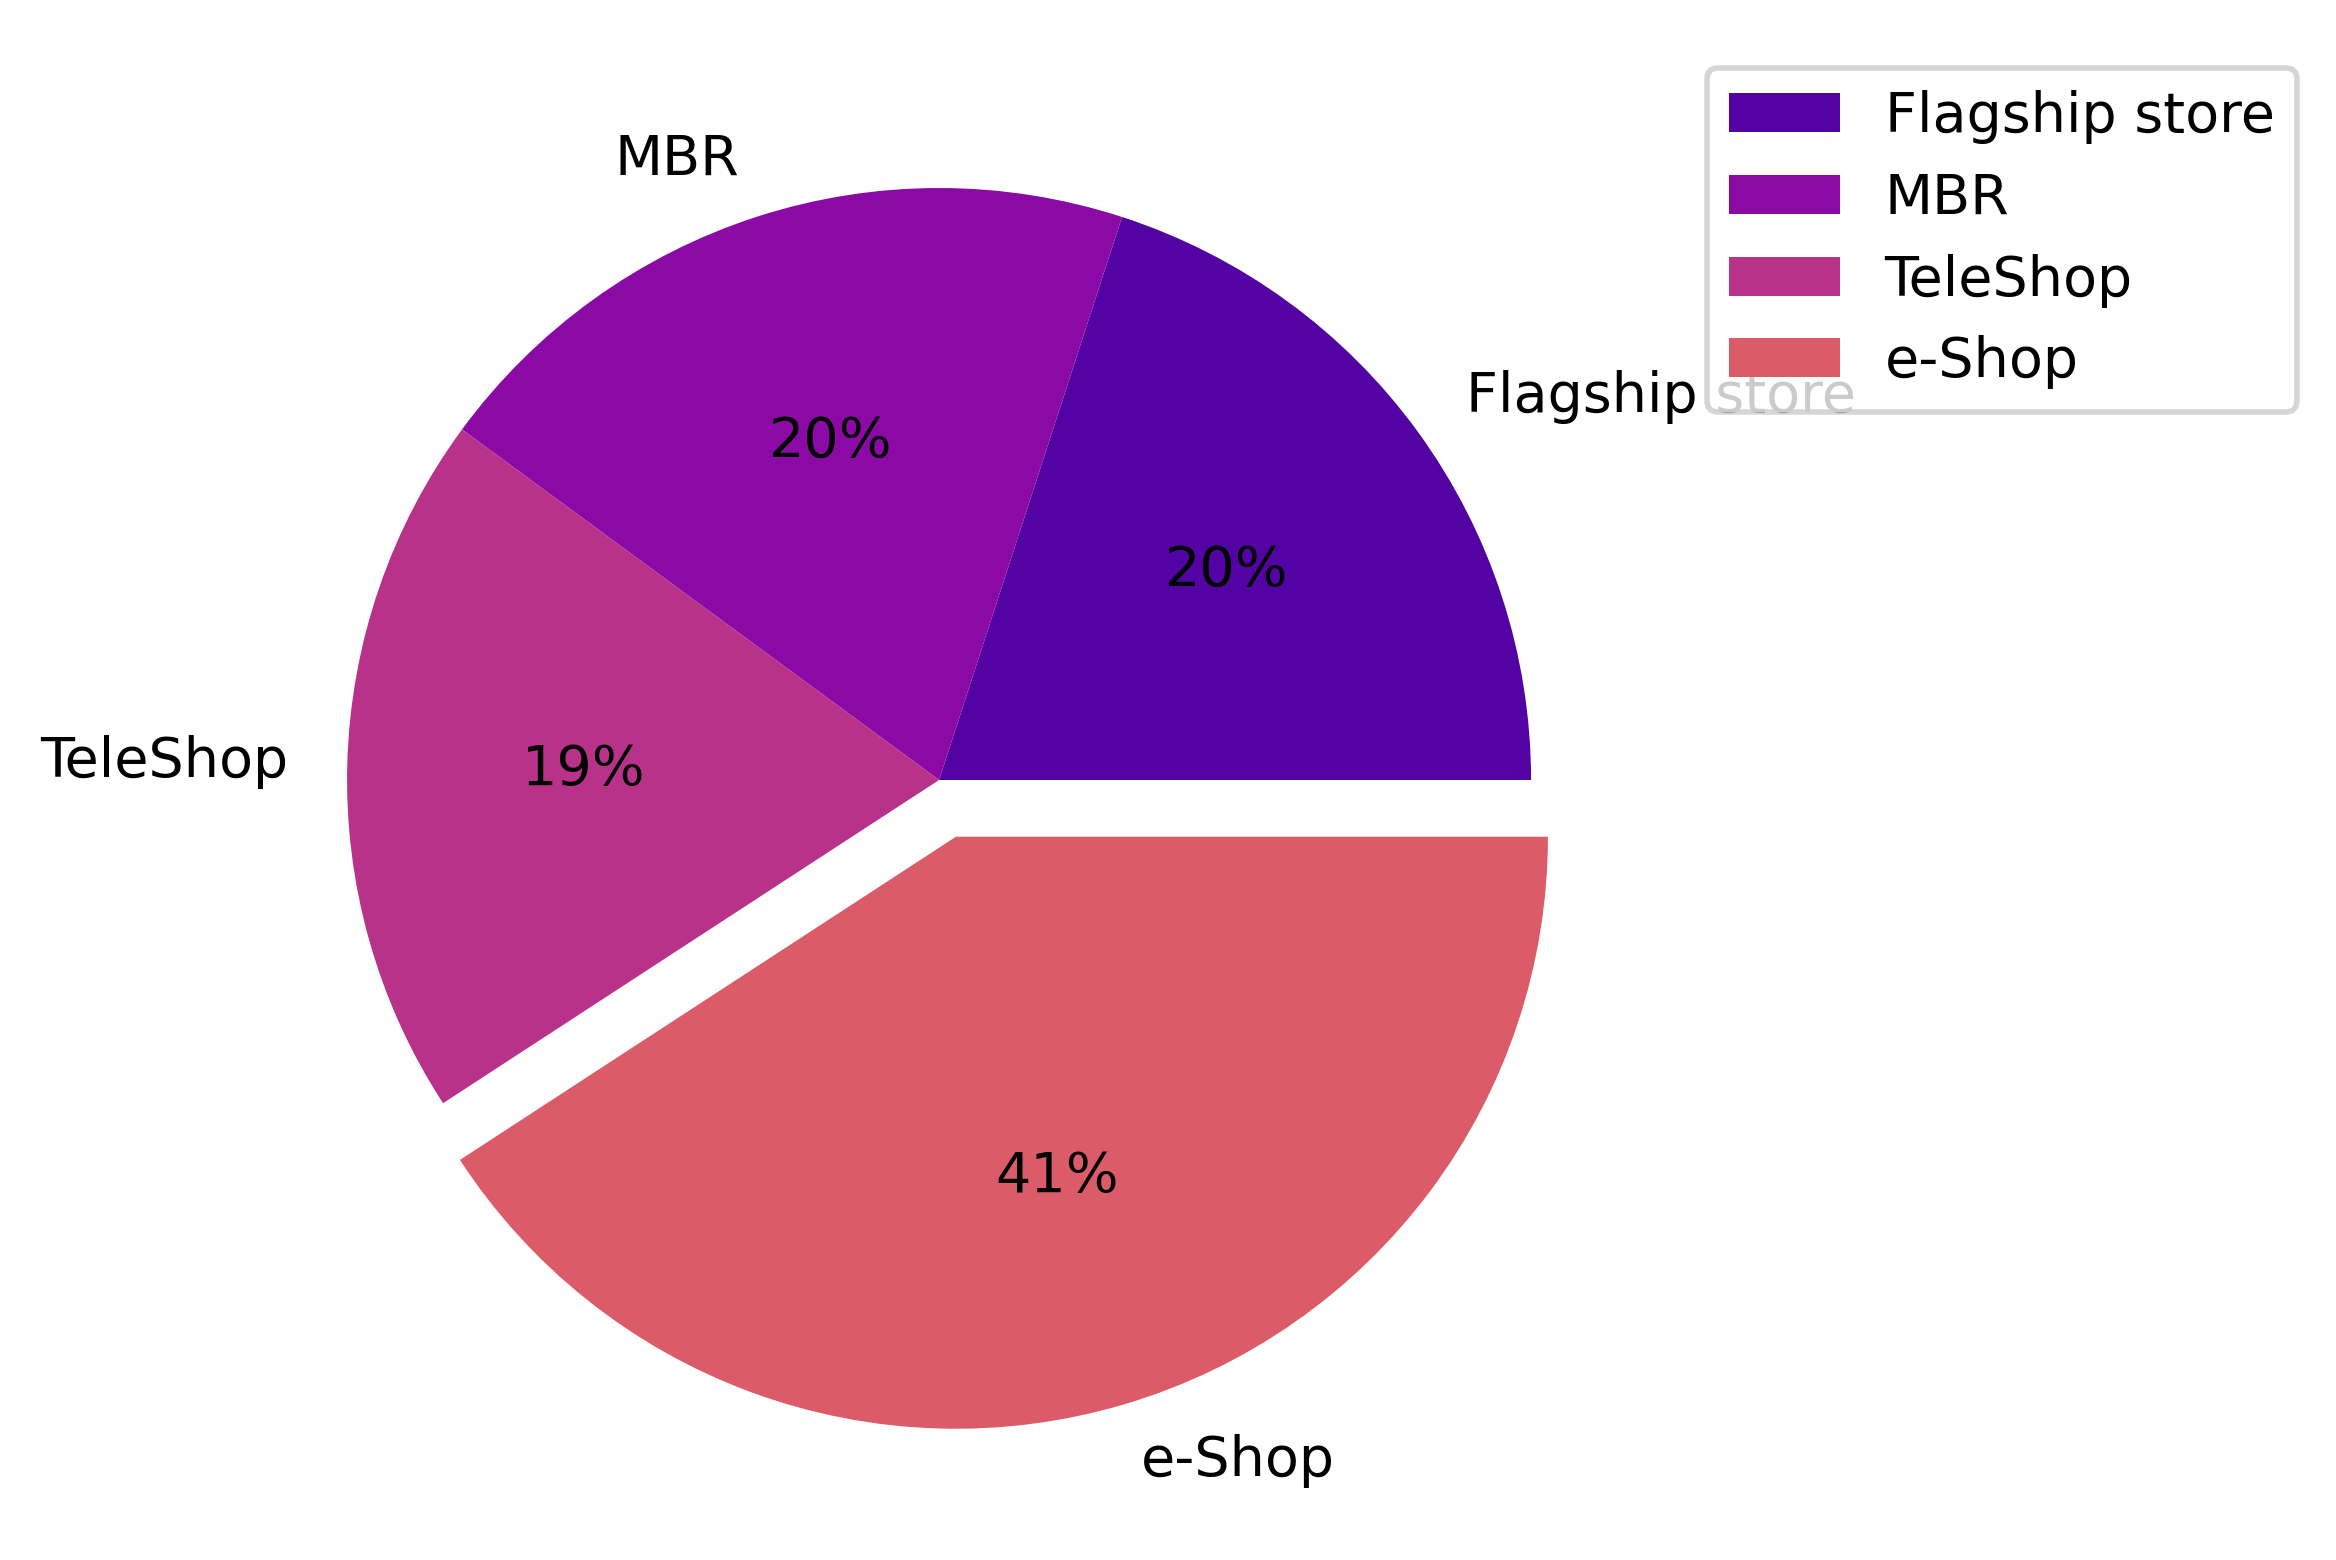

In [42]:
explode = [0, 0, 0, 0.1]

store = Customer_Final.groupby(['Store_type']).total_amt.sum().astype('float32').reset_index()
palette_color = sns.color_palette('plasma')
plt.pie(store.total_amt,labels=store.Store_type, colors=palette_color, autopct='%.0f%%', explode=explode)
plt.legend(['Flagship Store','MBR','TeleShop','eShop'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.rcParams["figure.figsize"] = (10,8)
plt.savefig("Storewise Revenue Generated.jpg")
plt.show()

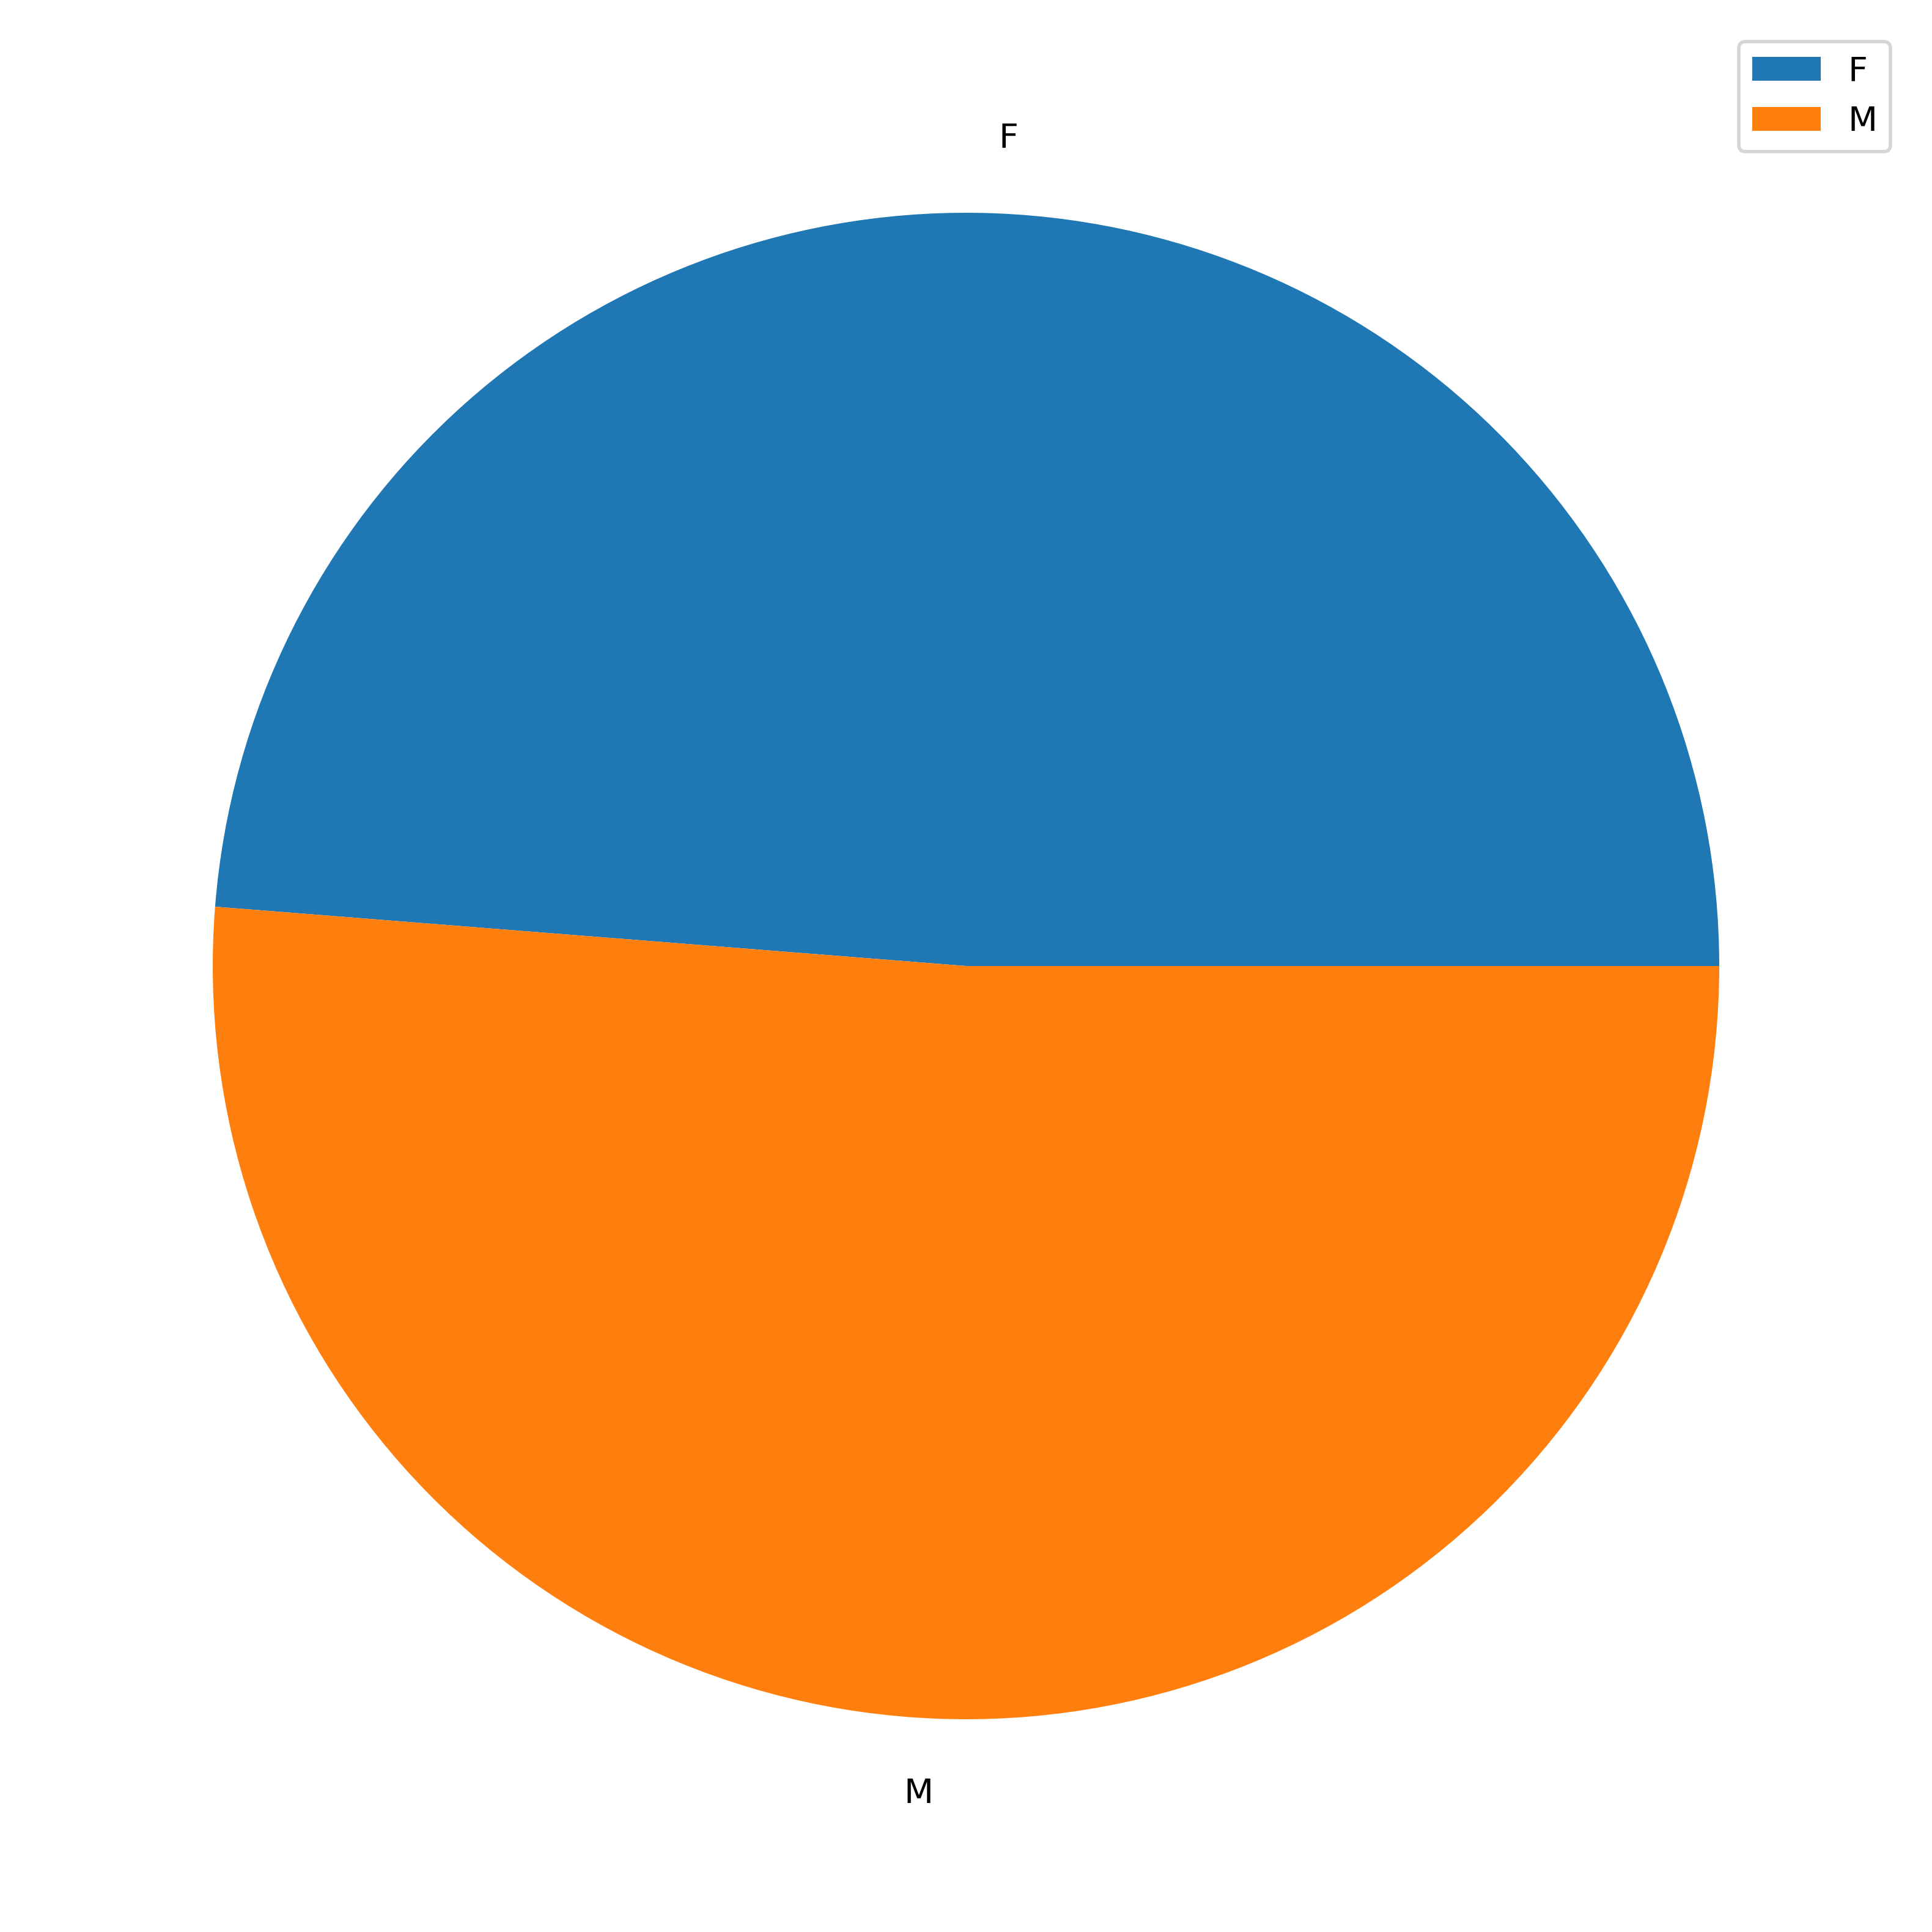

In [43]:
cust_g =Customer_Final.groupby(['Gender',]).cust_id.count().reset_index()
plt.pie(cust_g.cust_id, labels=cust_g.Gender)
plt.legend(['Male','Female'])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.rcParams["figure.figsize"] = (6,4)
plt.savefig("Gender wise Customer.jpg")
plt.show()

# Sales Based
## Basic KPI

In [44]:
print(f"The maximum purchase amount made by a customer is $ %.02f" %(Customer_Final.total_amt.max()))

The maximum purchase amount made by a customer is $ 8287.50


In [45]:
print(f"The maximum return amount by a customer is $ %.02f" %(Customer_Final.total_amt.min()))

The maximum return amount by a customer is $ -8270.92


In [46]:
print(f"The minimum amount spent by a customer is $ %.02f" %(Customer_Final[Customer_Final['total_amt']>0].total_amt.min()))

The minimum amount spent by a customer is $ 77.35


In [47]:
print(f"The average amount spent by a customer is $ %.02f" %(Customer_Final[Customer_Final['total_amt']>0].total_amt.mean()))

The average amount spent by a customer is $ 2608.44


# Quantity Based
## Basic KPI

In [48]:
print(f"The maximum quantity purchased by a customer is ", Customer_Final.Qty.max())

The maximum quantity purchased by a customer is  5


In [49]:
print(f"The maximum quantity returned by a customer is ", abs(Customer_Final.Qty.min()))

The maximum quantity returned by a customer is  5


In [50]:
print(f"The average quantity per order by a customer is " , round(Customer_Final[Customer_Final['Qty']>=0].Qty.mean(),2))

The average quantity per order by a customer is  3.0


In [51]:
print(f"The minimum quantity purchased by a customer is ", Customer_Final[Customer_Final['Qty']>=0].Qty.min())

The minimum quantity purchased by a customer is  1


In [52]:
print(f"The average quantity returned per order by a customer is ", abs(round(Customer_Final[Customer_Final['total_amt']<0].Qty.mean(),0)))

The average quantity returned per order by a customer is  3.0


# Price Based
## Basic KPI

In [53]:
print(f"The maximum tagged price of available product is $" , Customer_Final.Rate.max())

The maximum tagged price of available product is $ 1500


In [54]:
print(f"The maximum tagged price of available product returned by customer is $" , abs(Customer_Final[Customer_Final['total_amt']<0].Rate.min()))

The maximum tagged price of available product returned by customer is $ 1499


In [55]:
print(f"The average price of available product is $" , round(Customer_Final[Customer_Final['Rate']>0].Rate.mean(),2))

The average price of available product is $ 785.93


In [56]:
print(f"The minimum tagged price of available product is $" , Customer_Final[Customer_Final['Rate']>=0].Rate.min())

The minimum tagged price of available product is $ 70


# Customer Churn Rate

## For this First date when the customer purchased from our store is considred as satring date.

In [57]:
churn = Customer_Final.groupby('cust_id').agg(min_date = ('tran_date','min'),
                                      max_date = ('tran_date','max'),
                                      nos_purchase = ('cust_id','count'),
                                      total_qty = ('Qty','sum'),
                                      total_purcahse = ('total_amt','sum')).reset_index()

In [58]:
churn[churn['nos_purchase']<=1].value_counts().sum()

463

In [59]:
churn[(churn['nos_purchase']<=5)&(churn['nos_purchase']>=2)].value_counts().sum()

3650

In [60]:
churn[churn['nos_purchase']>=6].value_counts().sum()

1393

In [61]:
#overall churn rate
dead = churn[churn['nos_purchase']<=1].value_counts().sum()
tot = churn.cust_id.value_counts().sum()
rt = (dead/tot)*100
print(f"churn rate is: {round(rt,2)} percentage")

churn rate is: 8.41 percentage


### Churn Rate for Year 2011

In [62]:
y2011 = Customer_Final[Customer_Final['tran_year'] == 2011]
y2011_c = y2011.groupby('cust_id').agg(min_date = ('tran_date','min'),
                                      max_date = ('tran_date','max'),
                                      nos_purchase = ('cust_id','count'),
                                      total_qty = ('Qty','sum'),
                                      total_purcahse = ('total_amt','sum')).reset_index()
y2011_c.head(2)

,cust_id,min_date,max_date,nos_purchase,total_qty,total_purcahse
0,266783,2011-09-23,2011-09-24,2,0,0.000
1,266785,2011-03-15,2011-10-24,2,7,10047.765


In [63]:
y2011_c[y2011_c['nos_purchase']<=1].value_counts().sum()

1875

In [64]:
dead = y2011_c[y2011_c['nos_purchase']<=1].value_counts().sum()
tot = y2011_c.cust_id.value_counts().sum()
rt = (dead/tot)*100
print(f"churn rate is: {round(rt,2)} percentage")

churn rate is: 49.47 percentage


### Churn Rate for Year 2011-2012

In [65]:
y2012 = Customer_Final[Customer_Final['tran_year'] <= 2012]
y2012_c = y2012.groupby('cust_id').agg(min_date = ('tran_date','min'),
                                      max_date = ('tran_date','max'),
                                      nos_purchase = ('cust_id','count'),
                                      total_qty = ('Qty','sum'),
                                      total_purcahse = ('total_amt','sum')).reset_index()
y2012_c.head(2)

,cust_id,min_date,max_date,nos_purchase,total_qty,total_purcahse
0,266783,2011-09-23,2012-10-21,3,3,308.295
1,266784,2012-08-23,2012-12-04,3,10,5694.065


In [66]:
y2012_c[y2012_c['nos_purchase']<=1].value_counts().sum()

1222

In [67]:
dead = y2012_c[y2012_c['nos_purchase']<=1].value_counts().sum()
tot = y2012_c.cust_id.value_counts().sum()
rt = (dead/tot)*100
print(f"churn rate is: {round(rt,2)} percentage")

churn rate is: 23.9 percentage


### Churn Rate for Year 2011-2013

In [68]:
y2013 = Customer_Final[Customer_Final['tran_year'] <= 2013]
y2013_c = y2013.groupby('cust_id').agg(min_date = ('tran_date','min'),
                                      max_date = ('tran_date','max'),
                                      nos_purchase = ('cust_id','count'),
                                      total_qty = ('Qty','sum'),
                                      total_purcahse = ('total_amt','sum')).reset_index()
y2013_c.head(2)

,cust_id,min_date,max_date,nos_purchase,total_qty,total_purcahse
0,266783,2011-09-23,2013-02-20,5,6,3113.890
1,266784,2012-08-23,2012-12-04,3,10,5694.065


In [69]:
y2013_c[y2013_c['nos_purchase']<=1].value_counts().sum()

523

In [70]:
dead = y2013_c[y2013_c['nos_purchase']<=1].value_counts().sum()
tot = y2013_c.cust_id.value_counts().sum()
rt = (dead/tot)*100
print(f"churn rate is: {round(rt,2)} percentage")

churn rate is: 9.56 percentage


### Churn Rate for Year 2014

In [71]:
y2014 = Customer_Final[Customer_Final['tran_year'] <= 2014]
y2014_c = y2014.groupby('cust_id').agg(min_date = ('tran_date','min'),
                                      max_date = ('tran_date','max'),
                                      nos_purchase = ('cust_id','count'),
                                      total_qty = ('Qty','sum'),
                                      total_purcahse = ('total_amt','sum')).reset_index()
y2014_c.head(2)

,cust_id,min_date,max_date,nos_purchase,total_qty,total_purcahse
0,266783,2011-09-23,2013-02-20,5,6,3113.890
1,266784,2012-08-23,2012-12-04,3,10,5694.065


In [72]:
y2014_c[y2014_c['nos_purchase']<=1].value_counts().sum()

463

In [73]:
dead = y2014_c[y2014_c['nos_purchase']<=1].value_counts().sum()
tot = y2013_c.cust_id.value_counts().sum()
rt = (dead/tot)*100
print(f"churn rate is: {round(rt,2)} percentage")

churn rate is: 8.46 percentage


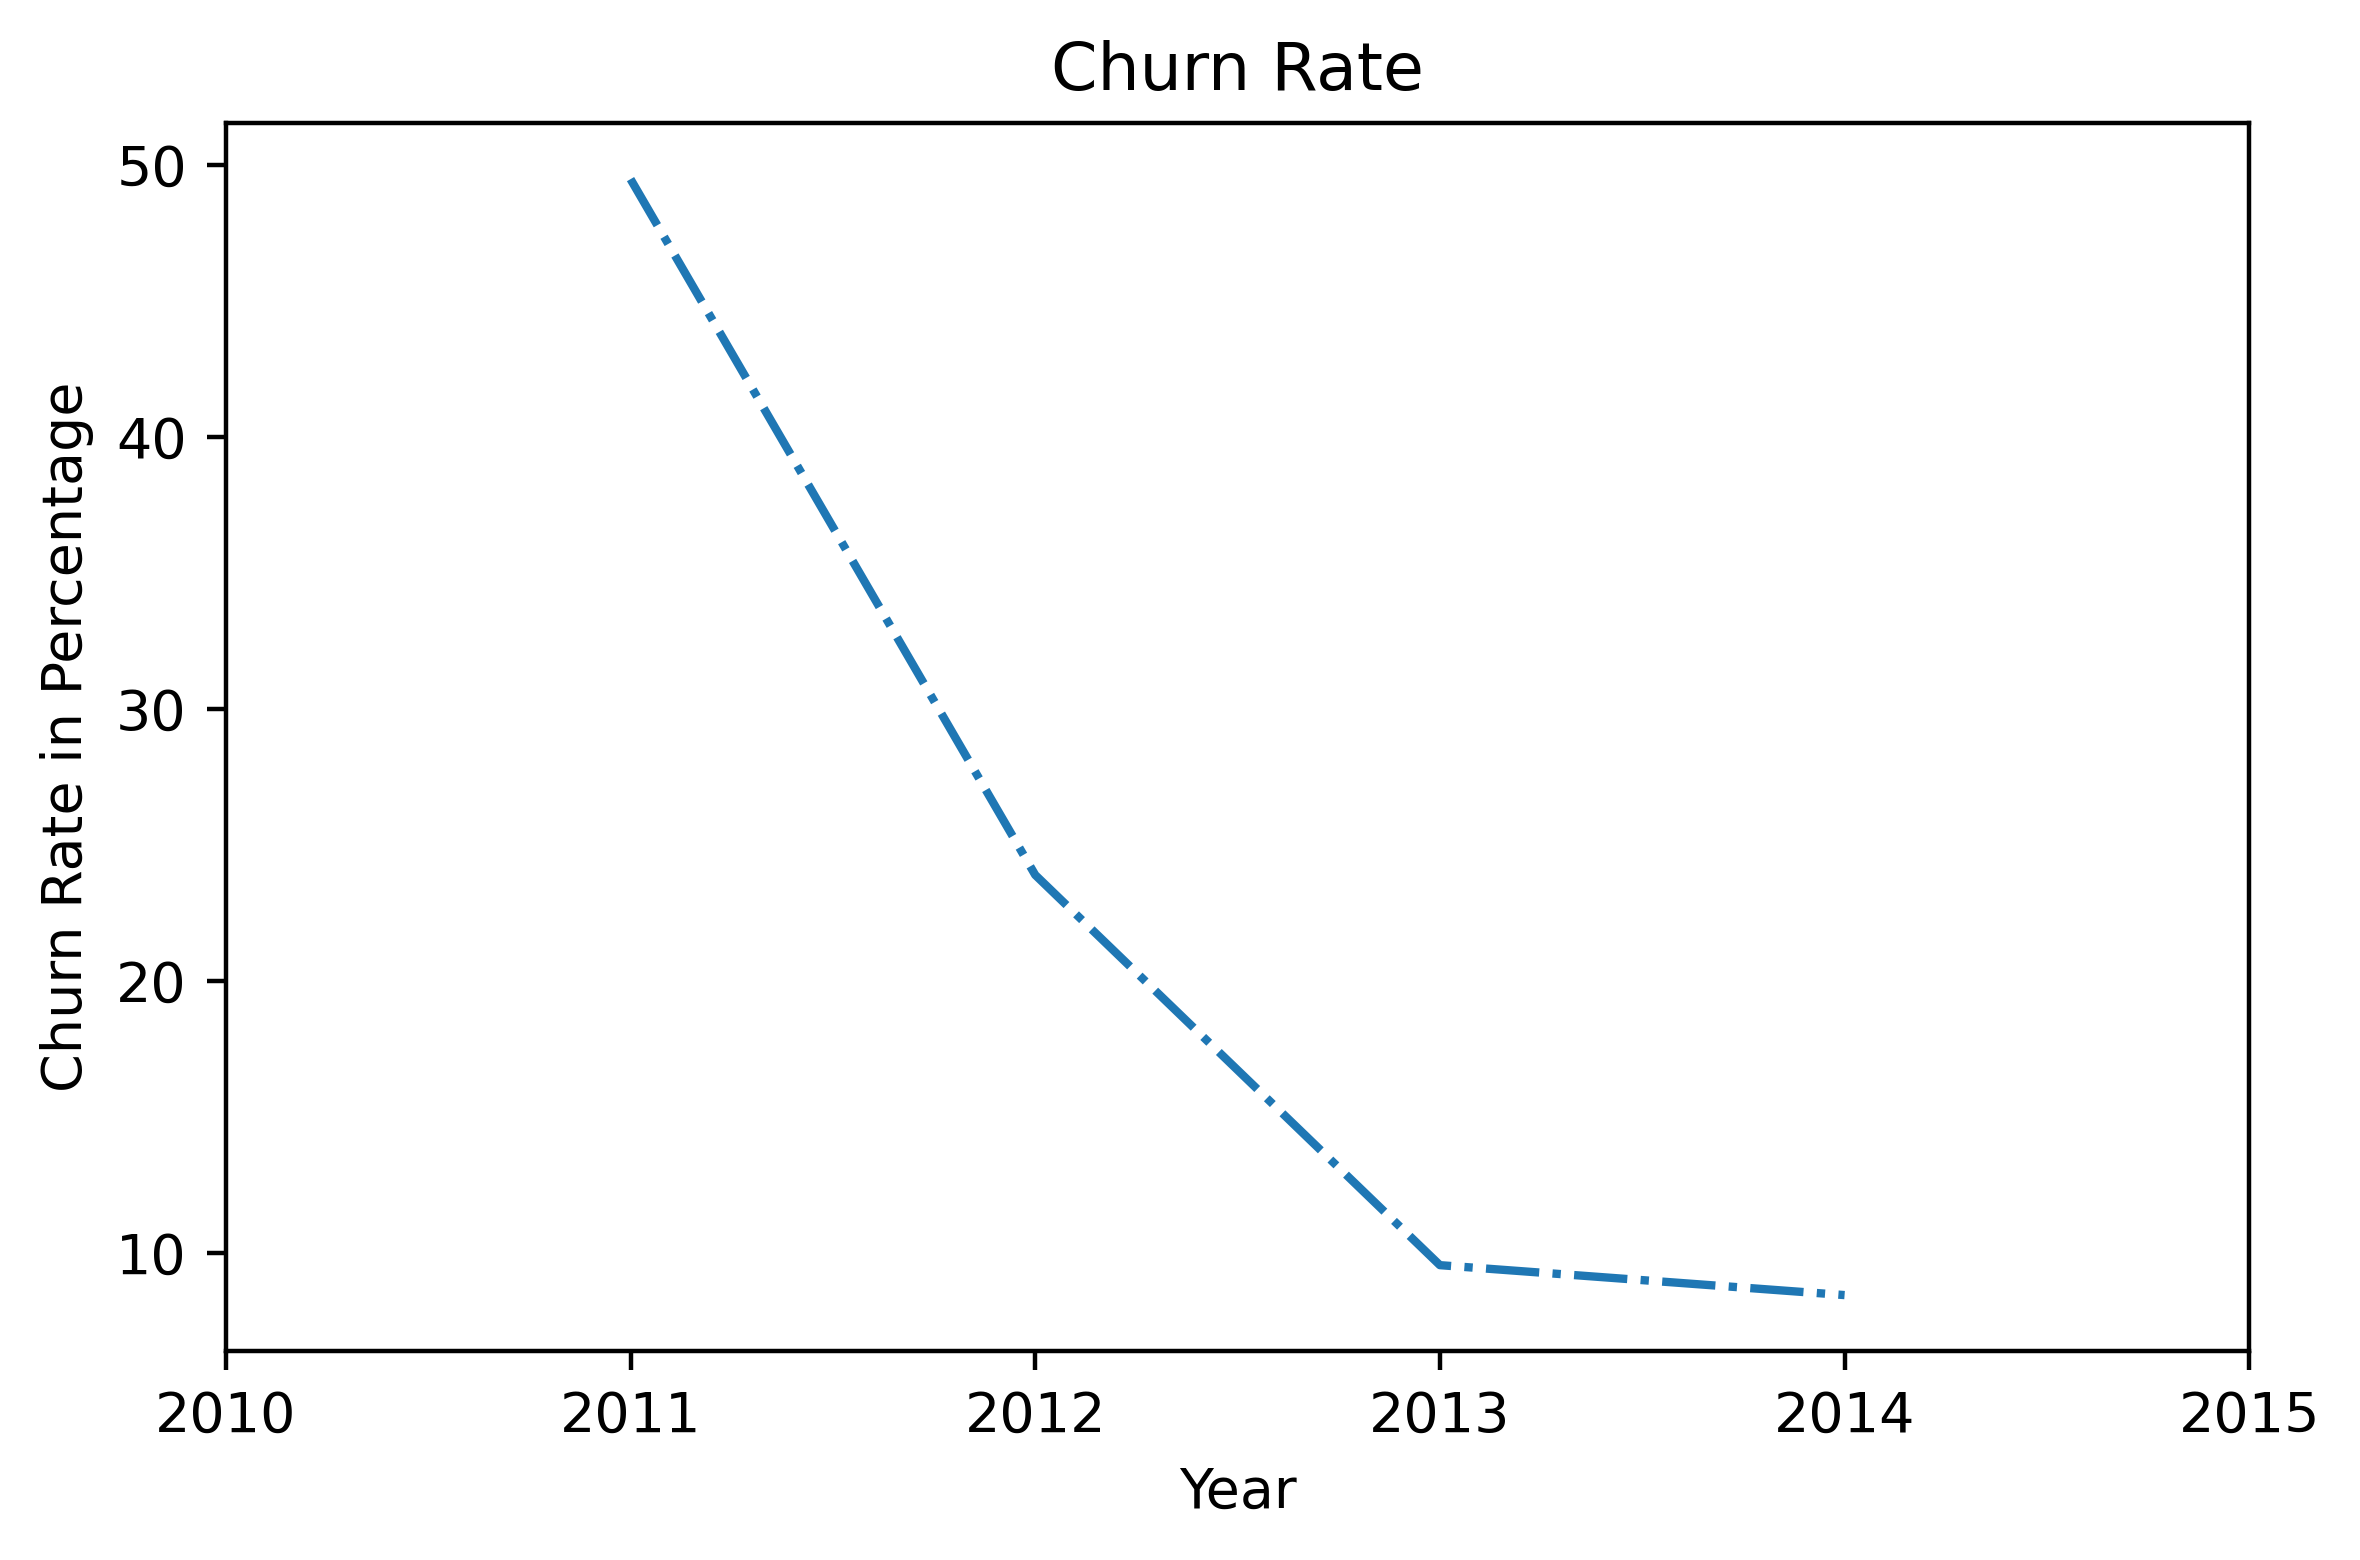

<Figure size 2000x2000 with 0 Axes>

In [74]:
churn_r = pd.DataFrame({'Year':[2011,2012,2013,2014], 'Churn_Rate':[49.47,23.9,9.56,8.46]})
plt.gcf()
plt.plot(churn_r.Year,churn_r.Churn_Rate,"-.")
#plt.bar(churn_r.Year,churn_r.Churn_Rate)
plt.xlabel("Year")
plt.ylabel("Churn Rate in Percentage")
plt.title("Churn Rate")
plt.xlim(2010,2015,1)
plt.savefig('Churnrate over Functioning Year.jpg')
plt.figure(figsize = (5,5))
plt.show()


In [75]:
churn_r

,Year,Churn_Rate
0,2011,49.47
1,2012,23.90
2,2013,9.56
3,2014,8.46
